In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv('/content/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(df.shape)

(150, 5)


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

sepal_length       Axes(0.125,0.53;0.133621x0.35)
sepal_width     Axes(0.285345,0.53;0.133621x0.35)
petal_length     Axes(0.44569,0.53;0.133621x0.35)
petal_width     Axes(0.606034,0.53;0.133621x0.35)
dtype: object

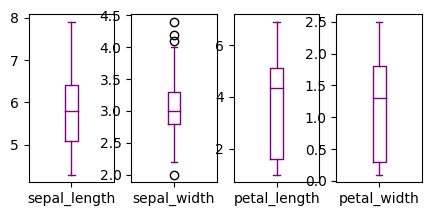

In [ ]:
df.plot(kind ='box',subplots = True, layout =(2,5),sharex = False, color='purple')

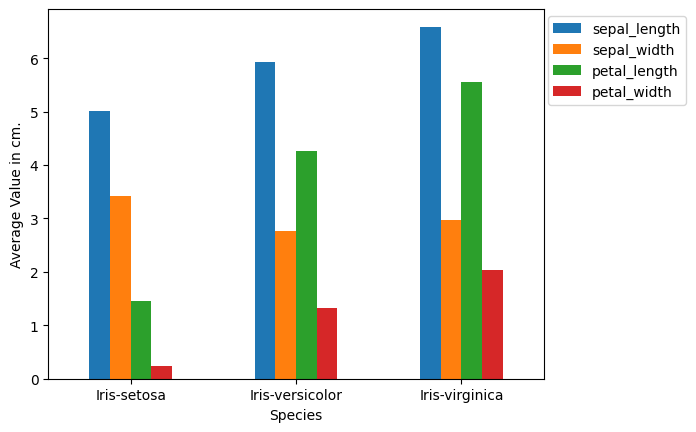

In [ ]:
# Calculate average feature values for each class
classes = np.unique(df['species'])
averages = []
for cls in classes:
    class_data = df[df['species'] == cls]
    avg_features = class_data.iloc[:, :-1].mean()
    averages.append(avg_features)

averages_df = pd.DataFrame(averages, index=classes)

# Plot the averages
averages_df.plot(kind='bar')
plt.xlabel("Species")
plt.ylabel("Average Value in cm.")
plt.xticks(rotation=0)
plt.legend(title="Features")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [ ]:
#Correlation
corr_mat = df.corr()
print(corr_mat)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


<ipython-input-11-bd5be60f54e6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [ ]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
train_y = train.species

test_X = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
test_y = test.species

In [ ]:
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
51,6.4,3.2,4.5,1.5
77,6.7,3.0,5.0,1.7
5,5.4,3.9,1.7,0.4
36,5.5,3.5,1.3,0.2
32,5.2,4.1,1.5,0.1


In [ ]:
train_y.head()

51    Iris-versicolor
77    Iris-versicolor
5         Iris-setosa
36        Iris-setosa
32        Iris-setosa
Name: species, dtype: object

In [ ]:
from sklearn.svm import SVC
Model = SVC()
Model.fit(train_X, train_y)
# Predict from the test dataset
predictions_svc = Model.predict(test_X)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predictions_svc)

0.9473684210526315

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
# Predict from the test dataset
prediction_LR = model.predict(test_X)
# Calculate the accuracy
accuracy_score(prediction_LR,test_y)

0.9736842105263158

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Classifier'],
    'Score': [0.973,0.921]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
0.973,Logistic Regression
0.921,Support Vector Classifier


In [ ]:
pred_y = model.predict(test_X)

In [ ]:
act_predict= pd.DataFrame({
    'Actual': test_y.values.flatten(),
    'Predict': pred_y.flatten()
})

act_predict.head(5)

,Actual,Predict
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-virginica,Iris-virginica


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision, recall, and F1-score
precision = precision_score(test_y, pred_y, average='weighted')
recall = recall_score(test_y, pred_y, average='weighted')
f1 = f1_score(test_y, pred_y, average='weighted')

results = pd.DataFrame({
    'Model': ['precision','recall','f1 score'],
    'Score': [precision,recall,f1]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
0.976608,precision
0.974103,f1 score
0.973684,recall
